# Algorithmic Trading
## Introduction
Technology has become an asset in finance: financial institutions are now evolving to technology companies rather than just staying occupied with just the financial aspect: besides the fact that technology brings about innovation the speeds and can help to gain a competitive advantage, the speed and frequency of financial transactions, together with the large data volumes, makes that financial institutions’ attention for technology has increased over the years and that technology has indeed become a main enabler in finance.

This notebook introduces how to implement some algorithmic trading strategies in Python.

### Stocks & Trading
When a company wants to grow and undertake new projects or expand, it can issue stocks to raise capital. A stock represents a share in the ownership of a company and is issued in return for money. Stocks are bought and sold: buyers and sellers trade existing, previously issued shares. The price at which stocks are sold can move independent of the company’s success: the prices instead reflect supply and demand. This means that, whenever a stock is considered as ‘desirable’, due to a success, popularity, … the stock price will go up.

Note that stocks are not exactly the same as bonds, which is when companies raise money through borrowing, either as a loan from a bank or by issuing debt.

As you just read, buying and selling or trading is essential when you’re talking about stocks, but certainly not limited to it: trading is the act of buying or selling an asset, which could be financial security, like stock, a bond or a tangible product, such as gold or oil.

Stock trading is then the process of the cash that is paid for the stocks is converted into a share in the ownership of a company, which can be converted back to cash by selling, and this all hopefully with a profit. Now, to achieve a profitable return, you either go long or short in markets: you either by shares thinking that the stock price will go up to sell at a higher price in the future, or you sell your stock, expecting that you can buy it back at a lower price and realize a profit. When you follow a fixed plan to go long or short in markets, you have a trading strategy.

Developing a trading strategy is something that goes through a couple of phases, just like when you, for example, build machine learning models: you formulate a strategy and specify it in a form that you can test on your computer, you do some preliminary testing or backtesting, you optimize your strategy and lastly, you evaluate the performance and robustness of your strategy.

Trading strategies are usually verified by backtesting: you reconstruct, with historical data, trades that would have occurred in the past using the rules that are defined with the strategy that you have developed. This way, you can get an idea of the effectiveness of your strategy and you can use it as a starting point to optimize and improve your strategy before applying it to real markets. Of course, this all relies heavily on the underlying theory or belief that any strategy that has worked out well in the past will likely also work out well in the future, and, that any strategy that has performed poorly in the past will likely also do badly in the future.

### Time Series Data
A time series is a sequence of numerical data points taken at successive equally spaced points in time. In investing, a time series tracks the movement of the chosen data points, such as the stock price, over a specified period of time with data points recorded at regular intervals.

However, what you’ll often see when you’re working with stock data is not just two columns, that contain period and price observations, but most of the times, you’ll have five columns that contain observations of the period and the opening, high, low and closing prices of that period. This means that, if your period is set at a daily level, the observations for that day will give you an idea of the opening and closing price for that day and the extreme high and low price movement for a particular stock during that day.

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

## Python Basics For Finance: Pandas

### Importing Data
The `pandas-datareader` package allows for reading in data from sources such as Google, Yahoo! Finance, World Bank,…

Here I am pulling apple stock from IEX, which provides historical prices for upto 5 years:

In [2]:
from pandas_datareader import data as pdr
import fix_yahoo_finance

start=datetime.datetime(2014, 10, 1)
end=datetime.datetime(2018, 1, 1)

appl = pdr.DataReader('AAPL', 'iex',start,end)
appl.head()

5y


,open,high,low,close,volume
date,,,,,
2014-10-01,94.4247,94.5186,92.6506,93.1011,51491286
2014-10-02,93.1856,94.0774,92.0310,93.7770,47757828
2014-10-03,93.3452,94.0680,92.9697,93.5142,43469585
2014-10-06,93.8239,94.4810,93.3264,93.5142,37051182
2014-10-07,93.3358,93.9835,92.6787,92.6975,42094183


An alternative to `pandas_datareader` is Quandl:

In [3]:
import quandl
aapl = quandl.get("WIKI/AAPL", start_date="2006-10-01", end_date="2012-01-01")
aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-02,75.10,75.870,74.30,74.86,25451400.0,0.0,1.0,9.651397,9.750352,9.548586,9.620553,178159800.0
2006-10-03,74.45,74.950,73.19,74.07,28239600.0,0.0,1.0,9.567863,9.632120,9.405935,9.519027,197677200.0
2006-10-04,74.10,75.462,73.16,75.38,29610100.0,0.0,1.0,9.522883,9.697919,9.402080,9.687381,207270700.0
2006-10-05,74.53,76.160,74.13,74.83,24424400.0,0.0,1.0,9.578144,9.787621,9.526738,9.616698,170970800.0
2006-10-06,74.42,75.040,73.81,74.22,16677100.0,0.0,1.0,9.564007,9.643686,9.485614,9.538304,116739700.0


### Working With Time Series Data
The data was read into a pandas dataframe, so all the normal functions are available

In [4]:
# Inspect the index 
aapl.index

# Inspect the columns
aapl.columns

# Select only the last 10 observations of `Close`
ts = aapl['Close'][-10:]

# Check the type of `ts` 
type(ts)

pandas.core.series.Series

In [5]:
# Inspect the first rows of November-December 2006
print(aapl.loc[pd.Timestamp('2006-11-01'):pd.Timestamp('2006-12-31')].head())

# Inspect the first rows of 2007 
print(aapl.loc['2007'].head())

# Inspect November 2006
print(aapl.iloc[22:43])

# Inspect the 'Open' and 'Close' values at 2006-11-01 and 2006-12-01
print(aapl.iloc[[22,43], [0, 3]])

              Open   High    Low  Close      Volume  Ex-Dividend  Split Ratio  \
Date                                                                            
2006-11-01  81.100  81.38  78.36  79.16  21828300.0          0.0          1.0   
2006-11-02  78.915  79.32  78.50  78.98  16624400.0          0.0          1.0   
2006-11-03  79.360  79.53  77.79  78.29  15424600.0          0.0          1.0   
2006-11-06  78.950  80.06  78.43  79.71  15520600.0          0.0          1.0   
2006-11-07  80.450  81.00  80.13  80.51  18783300.0          0.0          1.0   

            Adj. Open  Adj. High   Adj. Low  Adj. Close  Adj. Volume  
Date                                                                  
2006-11-01  10.422480  10.458464  10.070352   10.173163  152798100.0  
2006-11-02  10.141677  10.193726  10.088344   10.150031  116370800.0  
2006-11-03  10.198866  10.220713   9.997099   10.061356  107972200.0  
2006-11-06  10.146175  10.288826  10.079348   10.243846  108644200.0  
2006-1

In [6]:
# Sample 20 rows
sample = aapl.sample(20)

# Print `sample`
print(sample)

# Resample to monthly level 
monthly_aapl = aapl.resample('M')

# Print `monthly_aapl`
print(monthly_aapl)

                Open    High       Low   Close      Volume  Ex-Dividend  \
Date                                                                      
2007-08-15  122.7400  124.86  119.6500  119.90  35459000.0          0.0   
2010-11-16  305.7200  307.60  299.3200  301.59  23487500.0          0.0   
2008-01-16  165.2300  169.01  156.7000  159.64  79065900.0          0.0   
2008-04-22  167.4100  168.00  158.0900  160.20  51413300.0          0.0   
2009-09-22  185.1900  185.38  182.8500  184.48  12741200.0          0.0   
2010-12-31  322.9500  323.48  321.3100  322.56   6911000.0          0.0   
2010-05-28  259.3881  259.40  253.3500  256.88  29129100.0          0.0   
2011-05-09  347.8600  349.20  346.5276  347.60   7312400.0          0.0   
2009-11-02  189.8000  192.88  185.5700  189.31  24249400.0          0.0   
2008-03-25  139.9600  143.10  137.3300  140.98  37585400.0          0.0   
2008-10-23   96.5100   99.25   91.9000   98.23  59836800.0          0.0   
2009-12-15  195.8300  197

In [7]:
# Add a column `diff` to `aapl` 
aapl['diff'] = aapl.Open - aapl.Close

# Delete the new `diff` column
del aapl['diff']

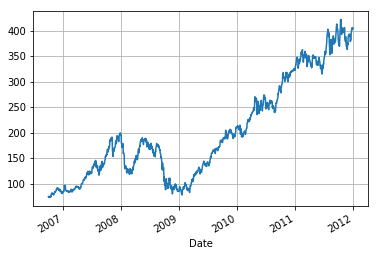

In [8]:
# Import Matplotlib's `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Plot the closing prices for `aapl`
aapl['Close'].plot(grid=True)

# Show the plot
plt.show()

## Common Financial Analysis
In the rest of this section, I will explore returns, moving windows, volatility calculation and Ordinary Least-Squares Regression (OLS).

### Returns
The simple daily percentage doesn't take into account dividends and other factors and represents the amount of percentage change in the value of a stock over a single day of trading.

Note I am calculating te log returns to get a better insight into the growth of the returns over the timeperiod.

In [9]:
# Assign `Adj Close` to `daily_close`
daily_close = aapl[['Adj. Close']]

# Daily retuns 
daily_pct_c = daily_close.pct_change()

# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_c)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

            Adj. Close
Date                  
2006-10-02    0.000000
2006-10-03   -0.010553
2006-10-04    0.017686
2006-10-05   -0.007296
2006-10-06   -0.008152
2006-10-09    0.005524
2006-10-10   -0.010988
2006-10-11   -0.007858
2006-10-12    0.027721
2006-10-13   -0.003189
2006-10-16    0.005065
2006-10-17   -0.014721
2006-10-18    0.003231
2006-10-19    0.059842
2006-10-20    0.012153
2006-10-23    0.018887
2006-10-24   -0.005033
2006-10-25    0.007773
2006-10-26    0.006244
2006-10-27   -0.021657
2006-10-30    0.000124
2006-10-31    0.008207
2006-11-01   -0.023680
2006-11-02   -0.002274
2006-11-03   -0.008736
2006-11-06    0.018138
2006-11-07    0.010036
2006-11-08    0.024096
2006-11-09    0.010794
2006-11-10   -0.002640
...                ...
2011-11-17   -0.019128
2011-11-18   -0.006545
2011-11-21   -0.015816
2011-11-22    0.020325
2011-11-23   -0.025285
2011-11-25   -0.009319
2011-11-28    0.034519
2011-11-29   -0.007763
2011-11-30    0.024116
2011-12-01    0.014992
2011-12-02 

In [10]:
# Resample `aapl` to business months, take last observation as value 
monthly = aapl.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

# Resample `aapl` to quarters, take the mean as value per quarter
quarter = aapl.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-28,0.125782,0.124336,0.121461,0.122890,0.369611,NaN,0.0,0.125782,0.124336,0.121461,0.122890,0.369611
2007-06-30,0.196028,0.195413,0.198331,0.197710,-0.080296,NaN,0.0,0.196028,0.195413,0.198331,0.197710,-0.080296
2007-10-31,0.400986,0.404614,0.392010,0.400796,0.306882,NaN,0.0,0.400986,0.404614,0.392010,0.400796,0.306882
2008-02-29,0.127085,0.131274,0.117746,0.120394,0.172293,NaN,0.0,0.127085,0.131274,0.117746,0.120394,0.172293
2008-06-30,-0.003844,-0.004781,0.005927,0.003673,-0.209762,NaN,0.0,-0.003844,-0.004781,0.005927,0.003673,-0.209762
2008-10-31,-0.114295,-0.108566,-0.124619,-0.118803,0.133219,NaN,0.0,-0.114295,-0.108566,-0.124619,-0.118803,0.133219
2009-02-28,-0.363319,-0.363614,-0.359304,-0.360865,-0.161601,NaN,0.0,-0.363319,-0.363614,-0.359304,-0.360865,-0.161601
2009-06-30,0.311992,0.304360,0.324701,0.316630,-0.386935,NaN,0.0,0.311992,0.304360,0.324701,0.316630,-0.386935


Using pct_change() is quite the convenience, but it also obscures how exactly the daily percentages are calculated. That’s why you can alternatively make use of Pandas’ shift() function instead of using pct_change(). You then divide the daily_close values by the daily_close.shift(1) -1. By using this function, however, you will be left with NA values in the beginning of the resulting DataFrame.

In [11]:
# Daily returns
daily_pct_c = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_c`
print(daily_pct_c)

            Adj. Close
Date                  
2006-10-02         NaN
2006-10-03   -0.010553
2006-10-04    0.017686
2006-10-05   -0.007296
2006-10-06   -0.008152
2006-10-09    0.005524
2006-10-10   -0.010988
2006-10-11   -0.007858
2006-10-12    0.027721
2006-10-13   -0.003189
2006-10-16    0.005065
2006-10-17   -0.014721
2006-10-18    0.003231
2006-10-19    0.059842
2006-10-20    0.012153
2006-10-23    0.018887
2006-10-24   -0.005033
2006-10-25    0.007773
2006-10-26    0.006244
2006-10-27   -0.021657
2006-10-30    0.000124
2006-10-31    0.008207
2006-11-01   -0.023680
2006-11-02   -0.002274
2006-11-03   -0.008736
2006-11-06    0.018138
2006-11-07    0.010036
2006-11-08    0.024096
2006-11-09    0.010794
2006-11-10   -0.002640
...                ...
2011-11-17   -0.019128
2011-11-18   -0.006545
2011-11-21   -0.015816
2011-11-22    0.020325
2011-11-23   -0.025285
2011-11-25   -0.009319
2011-11-28    0.034519
2011-11-29   -0.007763
2011-11-30    0.024116
2011-12-01    0.014992
2011-12-02 

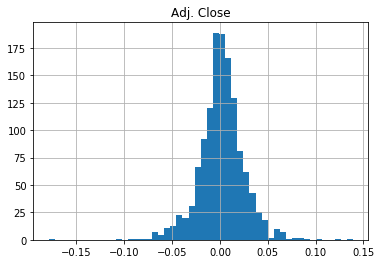

        Adj. Close
count  1322.000000
mean      0.001567
std       0.023994
min      -0.179195
25%      -0.010630
50%       0.001680
75%       0.014306
max       0.139050


In [12]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the distribution of `daily_pct_c`
daily_pct_c.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_c.describe())

The distribution looks very symmetrical and normally distributed: the daily changes centre approximately around 0.0. Using `.describe()` we can see that it is actually centred arounf 0.001567 and the standard deviation is 0.024.

The **cumulative daily rated of return** is useful to determine the value of an investment at regular intervals. The daily rate of return can be calculated by using the daily percentage change values, adding 1 to them and calculating the cumulative product with the resulting values:

In [13]:
#ncumulatice daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

print(cum_daily_return)

            Adj. Close
Date                  
2006-10-02         NaN
2006-10-03    0.989447
2006-10-04    1.006946
2006-10-05    0.999599
2006-10-06    0.991451
2006-10-09    0.996928
2006-10-10    0.985974
2006-10-11    0.978226
2006-10-12    1.005343
2006-10-13    1.002137
2006-10-16    1.007213
2006-10-17    0.992386
2006-10-18    0.995592
2006-10-19    1.055170
2006-10-20    1.067994
2006-10-23    1.088165
2006-10-24    1.082688
2006-10-25    1.091103
2006-10-26    1.097916
2006-10-27    1.074138
2006-10-30    1.074272
2006-10-31    1.083088
2006-11-01    1.057441
2006-11-02    1.055036
2006-11-03    1.045819
2006-11-06    1.064788
2006-11-07    1.075474
2006-11-08    1.101389
2006-11-09    1.113278
2006-11-10    1.110339
...                ...
2011-11-17    5.041544
2011-11-18    5.008549
2011-11-21    4.929335
2011-11-22    5.029522
2011-11-23    4.902351
2011-11-25    4.856666
2011-11-28    5.024312
2011-11-29    4.985306
2011-11-30    5.105530
2011-12-01    5.182073
2011-12-02 

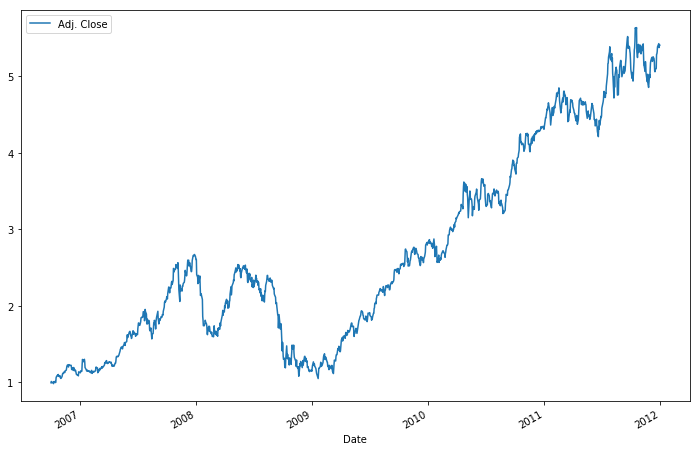

In [14]:
import matplotlib.pyplot as plt 

cum_daily_return.plot(figsize=(12,8))

plt.show()

In [15]:
# Resample the cumulative daily retunr to cumulaitve monthly return
cum_monthly_return = cum_daily_return.resample("M").mean()

print(cum_monthly_return)

            Adj. Close
Date                  
2006-10-31    1.031704
2006-11-30    1.140058
2006-12-31    1.155110
2007-01-31    1.187303
2007-02-28    1.145275
2007-03-31    1.210302
2007-04-30    1.251735
2007-05-31    1.453453
2007-06-30    1.625637
2007-07-31    1.818073
2007-08-31    1.734484
2007-09-30    1.897943
2007-10-31    2.295092
2007-11-30    2.333129
2007-12-31    2.544819
2008-01-31    2.142375
2008-02-29    1.671827
2008-03-31    1.747569
2008-04-30    2.113108
2008-05-31    2.468067
2008-06-30    2.384260
2008-07-31    2.240831
2008-08-31    2.285193
2008-09-30    1.886766
2008-10-31    1.322521
2008-11-30    1.254883
2008-12-31    1.222864
2009-01-31    1.185880
2009-02-28    1.256669
2009-03-31    1.302697
...                ...
2009-07-31    1.994629
2009-08-31    2.221219
2009-09-30    2.374922
2009-10-31    2.575896
2009-11-30    2.675928
2009-12-31    2.657690
2010-01-31    2.774723
2010-02-28    2.655557
2010-03-31    2.984379
2010-04-30    3.354910
2010-05-31 

### Gather More Companies Data
This will be done by writing a function that takes the symbol of the stock, start and end date. The nest function `data()` the takes the company symbol to get the data from the start date to the end date and returns it so that the `get()` function can continue.

In [16]:
import quandl

def get(tickers, startdate, enddate):
    def data(ticker):
        return (quandl.get(ticker, start_date=startdate, end_date=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))
tickers = ['WIKI/AAPL']
#tickers = ['WIKI/AAPL', 'WIKI/MSFT', 'WIKI/IBM', 'WIKI/GOOG']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))
all_data.sample(20)

Open     High      Low    Close      Volume  \
Ticker    Date                                                        
WIKI/AAPL 2009-04-29  124.85  126.850  123.830  125.140  16361100.0   
          2010-02-24  198.23  201.440  197.840  200.656  16448800.0   
          2008-06-30  170.04  172.000  166.620  167.440  24435600.0   
          2010-05-26  250.08  252.130  243.750  244.109  30380500.0   
          2007-10-30  186.18  189.370  184.730  187.000  33550500.0   
          2009-07-20  153.27  155.036  150.890  152.909  26268800.0   
          2011-10-26  401.76  402.550  393.151  400.600  16296600.0   
          2009-01-09   93.21   93.380   90.140   90.580  19530200.0   
          2010-04-14  245.28  245.810  244.070  245.690  14431300.0   
          2010-05-03  263.84  267.880  262.880  266.350  16226500.0   
          2011-01-11  344.88  344.960  339.470  341.640  15861000.0   
          2010-09-16  270.24  276.670  269.500  276.570  23289400.0   
          2007-04-04   94.94   95.140   94.130   94.270  17028000.0   
          2007-12-12  193.44  194.480  185.760  190.860  43773600.0   
          2011-07-15  361.17  365.000  359.170  364.920  17302400.0   
          2008-02-21  126.05  126.470  120.860  121.540  33504100.0   
          2007-12-24  195.03  199.330  194.790  198.800  17150100.0   
          2009-07-28  158.88  160.105  157.600  160.000  12984100.0   
          2009-07-08  135.92  138.040  134.420  137.220  20568900.0   
          2007-01-16   95.68   97.250   95.450   97.100  44431300.0   

                      Ex-Dividend  Split Ratio  Adj. Open  Adj. High  \
Ticker    Date                                                         
WIKI/AAPL 2009-04-29          0.0          1.0  16.044965  16.301993   
          2010-02-24          0.0          1.0  25.475318  25.887848   
          2008-06-30          0.0          1.0  21.852510  22.104397   
          2010-05-26          0.0          1.0  32.138766  32.402219   
          2007-10-30          0.0          1.0  23.926725  24.336684   
          2009-07-20          0.0          1.0  19.697331  19.924287   
          2011-10-26          0.0          1.0  51.631760  51.733286   
          2009-01-09          0.0          1.0  11.978784  12.000631   
          2010-04-14          0.0          1.0  31.521899  31.590011   
          2010-05-03          0.0          1.0  33.907117  34.426314   
          2011-01-11          0.0          1.0  44.321887  44.332168   
          2010-09-16          0.0          1.0  34.729607  35.555951   
          2007-04-04          0.0          1.0  12.201113  12.226816   
          2007-12-12          0.0          1.0  24.859736  24.993391   
          2011-07-15          0.0          1.0  46.415379  46.907587   
          2008-02-21          0.0          1.0  16.199182  16.253158   
          2007-12-24          0.0          1.0  25.064073  25.616683   
          2009-07-28          0.0          1.0  20.418294  20.575724   
          2009-07-08          0.0          1.0  17.467614  17.740064   
          2007-01-16          0.0          1.0  12.296214  12.497980   

                       Adj. Low  Adj. Close  Adj. Volume  
Ticker    Date                                            
WIKI/AAPL 2009-04-29  15.913881   16.082234  114527700.0  
          2010-02-24  25.425197   25.787093  115141600.0  
          2008-06-30  21.412992   21.518374  171049200.0  
          2010-05-26  31.325272   31.371409  212663500.0  
          2007-10-30  23.740380   24.032106  234853500.0  
          2009-07-20  19.391468   19.650938  183881600.0  
          2011-10-26  50.525383   51.482683  114076200.0  
          2009-01-09  11.584246   11.640792  136711400.0  
          2010-04-14  31.366397   31.574589  101019100.0  
          2010-05-03  33.783744   34.229687  113585500.0  
          2011-01-11  43.626626   43.905502  111027000.0  
          2010-09-16  34.634506   35.543100  163025800.0  
          2007-04-04  12.097017   12.115009  11919

The function above only works for premium subscribers to quandl, as free users are not able to make concurrent calls. Therefore a modified function is below.

In [17]:
# import quandl
def data(ticker, startdate, enddate):
    return (quandl.get(ticker, start_date=startdate, end_date=enddate))


def get(tickers, startdate, enddate):
    datas = []
    for ticker in tickers:
        dat = data(ticker, startdate, enddate)
        datas.append(dat) 
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['WIKI/AAPL', 'WIKI/MSFT', 'WIKI/IBM', 'WIKI/GOOG']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))
all_data.head(5)

Open    High    Low  Close      Volume  Ex-Dividend  \
Ticker    Date                                                               
WIKI/AAPL 2006-10-02  75.10  75.870  74.30  74.86  25451400.0          0.0   
          2006-10-03  74.45  74.950  73.19  74.07  28239600.0          0.0   
          2006-10-04  74.10  75.462  73.16  75.38  29610100.0          0.0   
          2006-10-05  74.53  76.160  74.13  74.83  24424400.0          0.0   
          2006-10-06  74.42  75.040  73.81  74.22  16677100.0          0.0   

                      Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Ticker    Date                                                                  
WIKI/AAPL 2006-10-02          1.0   9.651397   9.750352  9.548586    9.620553   
          2006-10-03          1.0   9.567863   9.632120  9.405935    9.519027   
          2006-10-04          1.0   9.522883   9.697919  9.402080    9.687381   
          2006-10-05          1.0   9.578144   9.787621  9.526738    9.616698   
          2006-10-06          1.0   9.564007   9.643686  9.485614    9.538304   

                      Adj. Volume  
Ticker    Date                     
WIKI/AAPL 2006-10-02  178159800.0  
          2006-10-03  197677200.0  
          2006-10-04  207270700.0  
          2006-10-05  170970800.0  
          2006-10-06  116739700.0

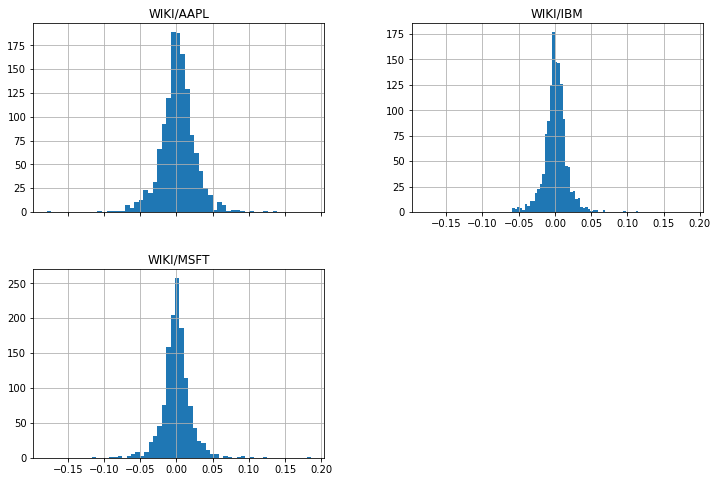

In [18]:
import matplotlib.pyplot as plt

# Isolate the `Adj. Close` values and trasnform the dataframe
daily_close_px = all_data[['Adj. Close']].reset_index().pivot('Date', 
                                                              'Ticker',
                                                              'Adj. Close')

# Calc the daily percentage change fro ` daily_close_px`
daily_pct_change = daily_close_px.pct_change()

daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

plt.show()

A useful plot is the scatter matrix. This can be done easily by using the `pandas` library and the `scatter_matrix()` function. As arguments, I am passinf the `daily_pct_change` and as a diagonal, I am setting that I want to have a Kernel Density Estimate (KDE) plot. The Kernel Density Estimate plot estimates the probability density functionn of a randomb

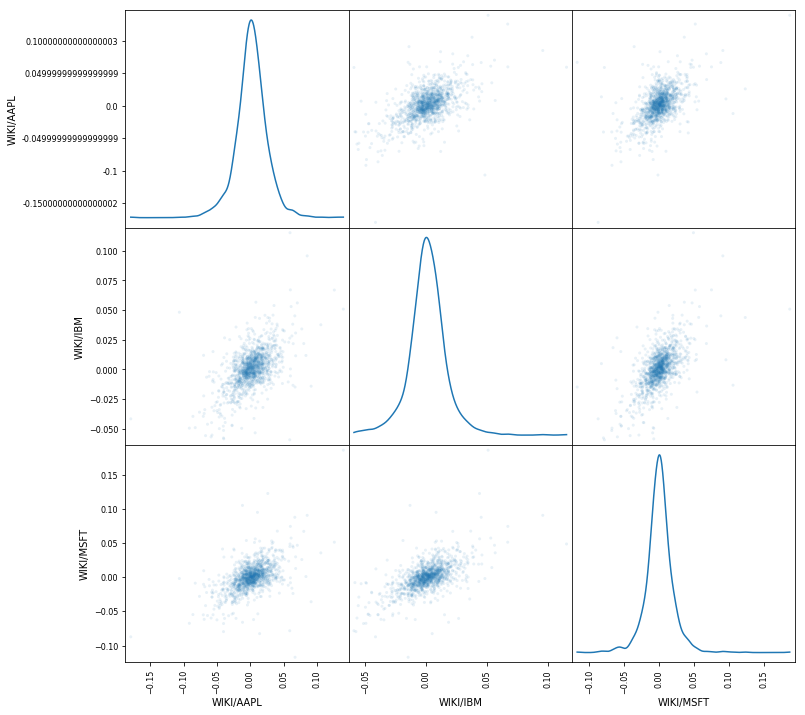

In [19]:
import matplotlib.pyplot as plt

# plot a scatter matrix with the `daily_pct_change` data
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1, 
                           figsize=(12,12))

plt.show()

### Moving Windows
Moving windows are there when you compute the statistic on a window of data represented by a particular period of time and then slide the window across the data by a specified interval.

Pandas offers a lot of functions to calculate moving windows, such as `rolling_mean()`, `rolling_std()`,...

However, these are soon to be depreciated, so instead a combination of the functions `rolling()` with `mean()` or `std()`.

But what does a moving window exactly mean?

The exact meaning depends on the statistic that you're applying to the data. For example, a rolling mean smoothes out short-term fluctuations and hightlights longer-term trends in the data.

In [20]:
adj_close_px = aapl['Adj. Close']

moving_avg = adj_close_px.rolling(window=40).mean()

print(moving_avg[-10:])

Date
2011-12-16    49.954364
2011-12-19    49.920115
2011-12-20    49.888564
2011-12-21    49.884307
2011-12-22    49.877721
2011-12-23    49.873352
2011-12-27    49.878428
2011-12-28    49.871552
2011-12-29    49.899215
2011-12-30    49.923601
Name: Adj. Close, dtype: float64


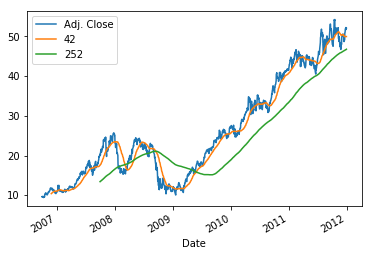

In [21]:
import matplotlib.pyplot as plt

# short moving window rolling mean
aapl['42'] = adj_close_px.rolling(window=42).mean()

# long moving window rolling mean
aapl['252'] = adj_close_px.rolling(window=252).mean()

# plot the adjusted closing price, the short and log windows of rolling
# means
aapl[['Adj. Close', '42', '252']].plot()

# show plot
plt.show()

### Volatility Calculation
The volatility of a stock is a measurement of the change in variance in the returns of a stock over a specific period of time. It is common to compare the volatility of a stock with another stock to get a feel for which may have less risk or to a market index to examine the stock's volatility in the overall market. Generally, the higher the volatility, the riskier the investment in that stock, which results in investing in one over another.

The moving historical standard deviation of the log returns - i.e. the moving historical volatility-might be more of interest: 

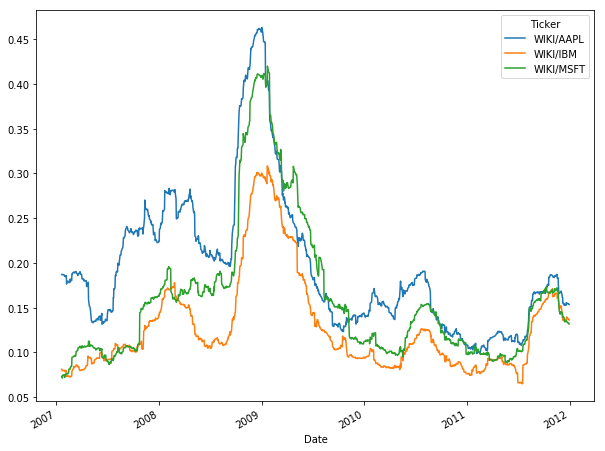

In [22]:
import matplotlib.pyplot as plt

# define the minimum number of periods to consider
min_periods = 75

# calculate volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods)

vol.plot(figsize=(10,8))

plt.show()

The volatilty is calculated by taking a rolling window standard deviation on the percentagr change in a stock. 

Note that the size of the window can anf will change the overall result: if you take the window and make `min_periods` larger, your result will become less representative. If you make it smaller and make the window more narrow, the result will come closer to the standard deviation.

Considering all of this, you see that it's definitely a skill to get the right window size based upon the data sampling frequency.

### Ordinary Least-Squares Regression (OLS)
After all of these calculations, I want to perform a more statistical analysis of the financial data, with more traditional regresssion analysis, such as Ordinary Least-Squares Regression (OLS).

To do this, I am going to . ake use of the `statsmodels` library, which not only provides not only the ability to estimate statistical models but also to conduct statistical tests and perform data exploration.

In [23]:
# Import the `api` model of `statsmodels` under alias `sm`
import statsmodels.api as sm

# Import the `datetools` module from `pandas`
from pandas.core import datetools

# Isolate the adjusted closing price
all_adj_close = all_data[['Adj. Close']]

# Calculate the returns 
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

# Isolate the AAPL returns 
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'WIKI/AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

# Isolate the MSFT returns
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'WIKI/MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')

# Build up a new DataFrame with AAPL and MSFT returns
return_data = pd.concat([aapl_returns, msft_returns], axis=1)[1:]
return_data.columns = ['AAPL', 'MSFT']

# Add a constant 
X = sm.add_constant(return_data['AAPL'])

# Construct the model
model = sm.OLS(return_data['MSFT'],X).fit()

# Print the summary
print(model.summary())

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     516.0
Date:                Mon, 23 Apr 2018   Prob (F-statistic):           1.09e-96
Time:                        20:18:47   Log-Likelihood:                 3514.1
No. Observations:                1322   AIC:                            -7024.
Df Residuals:                    1320   BIC:                            -7014.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.000     -1.119      0.2

Things to look out for when you're studying the result of the model summary are the following:

* The ```Dep. Varibale```, which indicates which varaibale is the response in the model
* The ```model``` in this case is ```OLS```. It's the model you're using in the fit.
* Additionally, you also have the ```Method``` to indicate how the paramters of the model were calculated. In this case, you see that this is set at ```Least Squares```.

Few other things that could be interesting:

* The number of observations (```No. Observations```). Note that you could also derive this with the Pandas package by using the ```info()``` function. Run ```return_data.info()``` in the IPython console of the DataCamp Light chunch above to confirm this.

* The degree of freedom of the residuals (```DF Residuals```)

* The number of parameters in the model, indicated by ```DF Model```; Note that the number doesn't include the constant term ```X``` which was defined in the code above.

* ```R-squared```, which is the coefficient of determination. This score indicates how well the regression line apporximates the real data points. In this case, the sult is 0.280. In percentages, this means that the score is at 28%. When the socr eis 0%, it indicates that the model explains none of the variablity of the response data around its mean. Of course, asocre of 100% indicates the opposite.

* The ```F-statistic``` measures how significant the fit is. It is calculated by dividing the mean sqaured error of the model by the mean squared error of the residuals. The F-statistic for this model is 514.2.

* Next, there's also the ```Prob(F-statisitc)```, which indicated the probability that you would get the result of the ```F-statistic```, given the null hypothesis that they are unrelated.

* The ```Log-likelihood``` indicates the log of the likelihood function, which is, in this case 3513.2.

* The ```AIC``` is the Akaike Infomration Criterion: this metric adjusts the log-likelihood based on the number of observations and the complexity of the model. The AIC of this model is -7022.

* Lastly the ```BIC``` or Bayesian Information Criterion, is simlar to the AIC, mentioned above, but it penalizes models with more paramters more severely. Given the fact that this model only has one parameter, the BIC socre will be the same as the AIC score.

Below the first part of the model summary, we get reports of each of the model's coefficients:

* The estimated value of the coefficient is registered at ```coef```.

* ```std err``` is the standard error of the estimate of the coefficient.

* There's also the t-statistic vlaue, which you'll find under ```t```. The metric is used to measure how statistically significant a coefficient is.

* ```P > |t|``` indicates the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0,05, it indicates that there is a statistically significant relationship between the term and the response. In this case, you see that the constant has a value of 0.198, while ```AAPL``` is set a 0.000.

Lastly the final part of the model summary in which you see other statistical tests to assess the distribution of the residuals:

* ```Omnibus```, which is the Omnibus D’Angostino’s test: it provides a combined statistical test for the presence of skewness and kurtosis.

* The ```Prob(Omnibus)``` is the ```Omnibus``` metric turned into a probability.

* Next, the ```Skew``` or Skewness measures the symmetry of the data about the mean.

* The ```Kurtosis``` gives an indication of the shape of the distribution, as it compares the amount of data close to the mean with those far away from the mean (in the tails).

* ```Durbin-Watson``` is a test for the presence of autocorrelation, and the ```Jarque-Bera``` is another test of the skewness and kurtosis. You can also turn the result of this test into a probability, as you can see in ```Prob (JB)```.

* Lastly, you have the ```Cond. No```, which tests the multicollinearity.

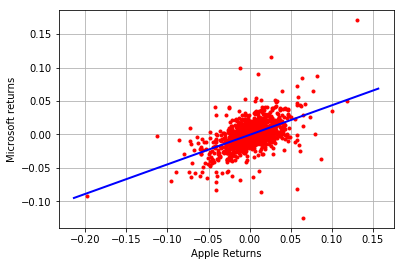

In [24]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot returns of AAPL and MSFT
plt.plot(return_data['AAPL'], return_data['MSFT'], 'r.')

# Add an axis to the plot
ax = plt.axis()

# Initialize `x`
x = np.linspace(ax[0], ax[1] + 0.01)

# Plot the regression line
plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

# Customize the plot
plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft returns')

# Show the plot
plt.show()

Note that you can also use the rolling correlation of returns as a way to crosscheck your results. You can handily make use of the Matplotlib integration with Pandas to call the plot() function on the results of the rolling correlation:

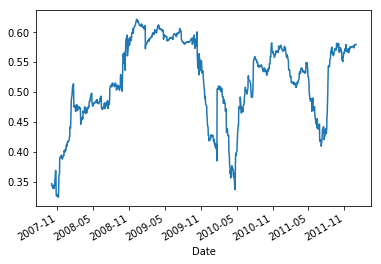

In [25]:
# Import matplotlib 
import matplotlib.pyplot as plt

# Plot the rolling correlation
return_data['MSFT'].rolling(window=252).corr(return_data['AAPL']).plot()

# Show the plot
plt.show()

## Building A Trading Strategy With Python

We have done some primary analyses to the data, it's time to formulate the first tradaing strategy. But first I am going to explain some common trading strategies.

### Common Trading Strategies
From the introduction, a trading strategy is a fixed plan to go long or short in markets, but much more information you didn’t really get yet; In general, there are two common trading strategies: the momentum strategy and the reversion strategy.

Firstly, the momentum strategy is also called divergence or trend trading. When you follow this strategy, you do so because you believe the movement of a quantity will continue in its current direction. Stated differently, you believe that stocks have momentum or upward or downward trends, that you can detect and exploit.

Some examples of this strategy are the moving average crossover, the dual moving average crossover, and turtle trading:

* The moving average crossover is when the price of an asset moves from one side of a moving average to the other. This crossover represents a change in momentum and can be used as a point of making the decision to enter or exit the market. I'll implement this, which is the “hello world” of quantitative trading later on in this tutorial.

* The dual moving average crossover occurs when a short-term average crosses a long-term average. This signal is used to identify that momentum is shifting in the direction of the short-term average. A buy signal is generated when the short-term average crosses the long-term average and rises above it, while a sell signal is triggered by a short-term average crossing long-term average and falling below it.

* Turtle trading is a well-known trend following strategy that was originally taught by Richard Dennis. The basic strategy is to buy futures on a 20-day high and sell on a 20-day low.

Secondly, the reversion strategy, which is also known as convergence or cycle trading. This strategy departs from the belief that the movement of a quantity will eventually reverse. This might seem a little bit abstract, but will not be so anymore when you take the example. Take a look at the mean reversion strategy, where you actually believe that stocks return to their mean and that you can exploit when it deviates from that mean.

That already sounds a whole lot more practical, right?

Another example of this strategy, besides the mean reversion strategy, is the pairs trading mean-reversion, which is similar to the mean reversion strategy. Whereas the mean reversion strategy basically stated that stocks return to their mean, the pairs trading strategy extends this and states that if two stocks can be identified that have a relatively high correlation, the change in the difference in price between the two stocks can be used to signal trading events if one of the two moves out of correlation with the other. That means that if the correlation between two stocks has decreased, the stock with the higher price can be considered to be in a short position. It should be sold because the higher-priced stock will return to the mean. The lower-priced stock, on the other hand, will be in a long position because the price will rise as the correlation will return to normal.

Besides these two most frequent strategies, there are also other ones that you might come across once in a while, such as the forecasting strategy, which attempts to predict the direction or value of a stock, in this case, in subsequent future time periods based on certain historical factors. There’s also the High-Frequency Trading (HFT) strategy, which exploits the sub-millisecond market microstructure.

That’s all music for the future for now; Let’s focus on developing your first trading strategy for now!

### A Simple Trading Strategy
This is the moving average crossover. The strategy that I'll be developing is simple: I create two separate Simple moving Averages (SMA) of a time seires with differing lookback periods, let's say, 40 days and 100 days. If the short moving average exceeds the long moving average then I go long, if the long moving average exceeds the short moving then you exit.

Let's break the trading strategy down step by step:

* First define two lookback periods: a short window and a long window. 
* Next, make an empty ```signals``` DataFrame, but do make sure to copy the index of your ```aapl``` data so that you can start calculating the daily buy or sell signal for your ```aapl``` data.
* Create a column in your empty ```signals``` DataFrame that is named ```signal``` and initialize it by setting the value for all rows in this column to 0.0.
* Create the set of short and long moving averages over the respective long and short time windows.
* Having calculated the short and long windows, create a signal when the short moving average crosses the long moving average, but only for the period greater than the shortest moving average window.

In [26]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=aapl.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = aapl['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = aapl['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

# Print `signals`
print(signals)

            signal  short_mavg   long_mavg  positions
Date                                                 
2006-10-02     0.0   74.860000   74.860000        NaN
2006-10-03     0.0   74.465000   74.465000        0.0
2006-10-04     0.0   74.770000   74.770000        0.0
2006-10-05     0.0   74.785000   74.785000        0.0
2006-10-06     0.0   74.672000   74.672000        0.0
2006-10-09     0.0   74.665000   74.665000        0.0
2006-10-10     0.0   74.542857   74.542857        0.0
2006-10-11     0.0   74.378750   74.378750        0.0
2006-10-12     0.0   74.476667   74.476667        0.0
2006-10-13     0.0   74.531000   74.531000        0.0
2006-10-16     0.0   74.610000   74.610000        0.0
2006-10-17     0.0   74.583333   74.583333        0.0
2006-10-18     0.0   74.579231   74.579231        0.0
2006-10-19     0.0   74.894286   74.894286        0.0
2006-10-20     0.0   75.231333   75.231333        0.0
2006-10-23     0.0   75.620625   75.620625        0.0
2006-10-24     0.0   75.9400

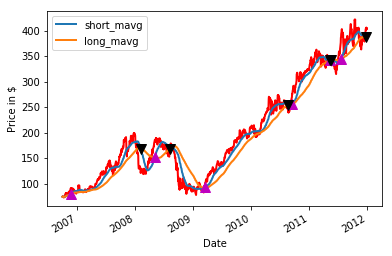

In [27]:
# Import `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
aapl['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

### Backtesting the Trading Strategy
Now that we have a trading strategy, it's a good idea to also backtest it and calculate its performance.

#### Backtesting Pitfalls
Backtesting is, besides just “testing a trading strategy”, testing the strategy on relevant historical data to make sure that it’s an actual viable strategy before you start making moves. With backtesting, a trader can simulate and analyze the risk and profitability of trading with a specific strategy over a period of time. However, when you’re backtesting, it’s a good idea to keep in mind that there are some pitfalls, which might not be obvious to you when you’re just starting out.

For example, there are external events, such as market regime shifts, which are regulatory changes or macroeconomic events, which definitely influence your backtesting. Also, liquidity constraints, such as the ban of short sales, could affect your backtesting heavily.

Next, there are pitfalls which you might introduce yourself when you, for example, overfit a model (optimization bias), when you ignore strategy rules because you think it’s better like that (interference), or when you accidentally introduce information into past data (lookahead bias).

#### Backtesting Components
There are four essential components:

* A data handler, which is an interface to a set of data,
* A strategy, which generates a signal to go long or go short based on the data,
* A portfolio, which generates orders and manages Profit & Loss (also known as “PnL”), and
* An execution handler, which sends the order to the broker and receives the “fills” or signals that the stock has been bought or sold.


#### Python Tools
To implement the backtesting, you can make use of some other tools besides ```Pandas```, which you have already used extensively in the first part of this tutorial to perform some financial analyses on your data. Apart from Pandas, there is, for example, also ```NumPy``` and ```SciPy```, which provide, vectorization, optimization and linear algebra routines which you can use when you’re developing trading strategies.

Also Scikit-Learn, the Python Machine Learning library, can come in handy when you’re working with forecasting strategies, as they offer everything you need to create regression and classification models.

Lastly, there’s also the ```IbPy``` and ```ZipLine``` libraries. The former offers you a Python API for the Interactive Brokers online trading system: you’ll get all the functionality to connect to Interactive Brokers, request stock ticker data, submit orders for stocks,… The latter is an all-in-one Python backtesting framework that powers Quantopian, which you’ll use in this tutorial.

#### Implementation of a Simple Backtester
A simple backtester consists of a strategy, a data handler. a protfolio and an execution handler. The startegy has been implmented, we have access to a data handler, which is ```pandas-datareader```. The components left to implementare the execution handler and the portfolio.

However, I am not going to focus on implementing an execution handler just yet. Instead, you’ll see below how you can get started on creating a portfolio which can generate orders and manages the profit and loss:

* First off, you’ll create set a variable ```initial_capital``` to set your initial capital and a new DataFrame positions. Once again, you copy the index from another DataFrame; In this case, this is the ```signals``` DataFrame because you want to consider the time frame for which you have generated the signals.
* Next, you create a new column ```AAPL``` in the DataFrame. On the days that the signal is 1 and the the short moving average crosses the long moving average (for the period greater than the shortest moving average window), you’ll buy a 100 shares. The days on which the signal is 0, the final result will be 0 as a result of the operation ```100*signals['signal']```.
* A new DataFrame ```portfolio``` is created to store the market value of an open position.
* Next, you create a DataFrame that stores the differences in positions (or number of stock)
* Then the real backtesting begins: you create a new column to the ```portfolio``` DataFrame with name ```holdings```, which stores the value of the positions or shares you have bought, multiplied by the ‘Adj Close’ price.
* Your ```portfolio``` also contains a ```cash``` column, which is the capital that you still have left to spend: it is calculated by taking your ```initial_capital``` and subtracting your holdings (the price that you paid for buying stock).
* You’ll also add a ```total``` column to your ```portfolio``` DataFrame, which contains the sum of your cash and the holdings that you own, and
* Lastly, you also add a ```returns``` column to your portfolio, in which you’ll store the returns

In [28]:
# set initial capital
initial_capital= float(100000.0)

# create positions dataframe
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# buy 100 shares
positions['AAPL'] = 100*signals['signal']   

# initialise portfolio with value owned
portfolio = positions.multiply(aapl['Adj. Close'], axis=0)

# store the difference in shares owned
pos_diff = positions.diff()

# add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(aapl['Adj. Close'], axis=0)).sum(axis=1)

# add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl['Adj. Close'], axis=0)).sum(axis=1).cumsum()   

# add `total` portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# add `returns`
portfolio['returns'] = portfolio['total'].pct_change()

print(portfolio.head())

            AAPL  holdings      cash     total  returns
Date                                                   
2006-10-02   0.0       0.0  100000.0  100000.0      NaN
2006-10-03   0.0       0.0  100000.0  100000.0      0.0
2006-10-04   0.0       0.0  100000.0  100000.0      0.0
2006-10-05   0.0       0.0  100000.0  100000.0      0.0
2006-10-06   0.0       0.0  100000.0  100000.0      0.0


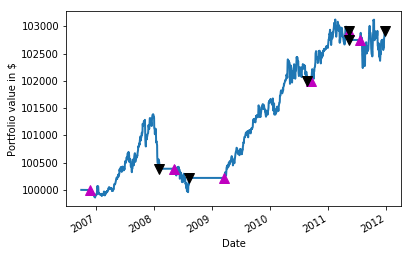

In [29]:
# Import the `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Create a figure
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

### Backtesting with Zipline & Quantopian

Shown above how to implement a backtester in ```pandas```. However it is easy to make mistakes. Therefore common to use a backtesting platform such as Quantopian. Quantopian is powered by ```zipline```, a pyhton library for algorithmic trading.

### Improving the Trading Strategy
So far I have successfully made a simple trading algorithm and performed backtests via Pandas. However, when you have coded up the trading strategy and backtested it, your work doesn’t stop yet; You might want to improve your strategy. There are one or more algorithms may be used to improve the model on a continuous basis, such as KMeans, k-Nearest Neighbors (KNN), Classification or Regression Trees and the Genetic Algorithm. This will be the topic of a future DataCamp tutorial.

Apart from the other algorithms you can use, you saw that you can improve your strategy by working with multi-symbol portfolios. Just incorporating one company or symbol into your strategy often doesn’t really say much. You’ll also see this coming back in the evaluation of your moving average crossover strategy. Other things that you can add or do differently is using a risk management framework or use event-driven backtesting to help mitigate the lookahead bias that you read about earlier. There are still many other ways in which you could improve your strategy, but for now, this is a good basis to start from!

In [30]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.7261238825870245


You can also calculate a Maximum Drawdown, which is used to measure the the largest single drop from peak to bottom in the value of a portfolio, so before a new peak is achieved. In other words, the score indicates the risk of a portfolio chosen based on a certain strategy.

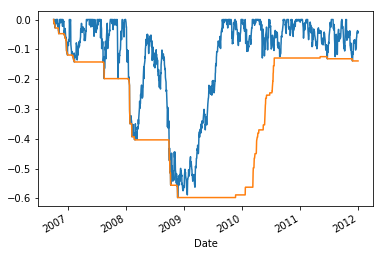

In [32]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day 
rolling_max = aapl['Adj. Close'].rolling(window, min_periods=1).max()
daily_drawdown = aapl['Adj. Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

Next up is the Compound Annual Growth Rate (CAGR), which provides you with a constant rate of return over the time period. In other words, the rate tells you what you really have at the end of your investment period. You can calculate this rate by first dividing the investments ending value (EV) by the investment’s beginning value (BV). You raise the result to the power of 1/n, where n is the number of periods. You subtract 1 from the consequent result and there’s your CAGR!

Maybe a formula is more clear:
(EV/BV)1/n−1

Note that, in the code chunk below, you’ll see that you consider days, so your 1 is adjusted to 365 days (which is equal to 1 year).